## Introduction & Overview

### Types of skin cancer

1. Melanocytic nevi (nv)
2. Melanoma (mel)
3. Benign keratosis-like lesions (bkl)
4. Basal cell carcinoma (bcc)
5. Actinic keratoses (akiec)
6. Vascular lesions (vasc)
7. Dermatofibroma (df)

So, we have a total of 7 classes.

## Sorting Dataset

### Importing and defining defaults

In [2]:
import os
import pandas as pd
import shutil

In [1]:
all_images_dir = os.getcwd() + '/data/all_images'
sorted_images_dir = os.getcwd() + '/data/sorted_images'
csv_file_path = os.getcwd() + '/data/HAM10000_metadata.csv'
no_of_classes = 7

### Reading the metadata

In [3]:
skin_df = pd.read_csv(csv_file_path)
print(skin_df['dx'].value_counts(), end='\n\n')

class_labels = skin_df['dx'].unique().tolist()
print("Class Labels: ", class_labels)

skin_df.head()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

Class Labels:  ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


### Copying the images into specific folders

In [ ]:
image_ids = []

for class_label in class_labels:
    os.makedirs(sorted_images_dir + '/' + class_label, exist_ok=True)
    image_id = skin_df[skin_df['dx'] == class_label]['image_id']
    image_ids.extend(image_id)

    for image_id in image_ids:
        shutil.copyfile(all_images_dir + '/' + image_id + '.jpg', sorted_images_dir + '/' + class_label + '/' + image_id + '.jpg')
    image_ids.clear()

## Preprocessing the Dataset

In [6]:
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Transforming the labels into numbers

In [7]:
labelEncoder = LabelEncoder()
labelEncoder.fit(skin_df['dx'])

skin_df['label'] = labelEncoder.transform(skin_df['dx'])
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2


### Seeing the data distribution

c:\Users\Bella\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


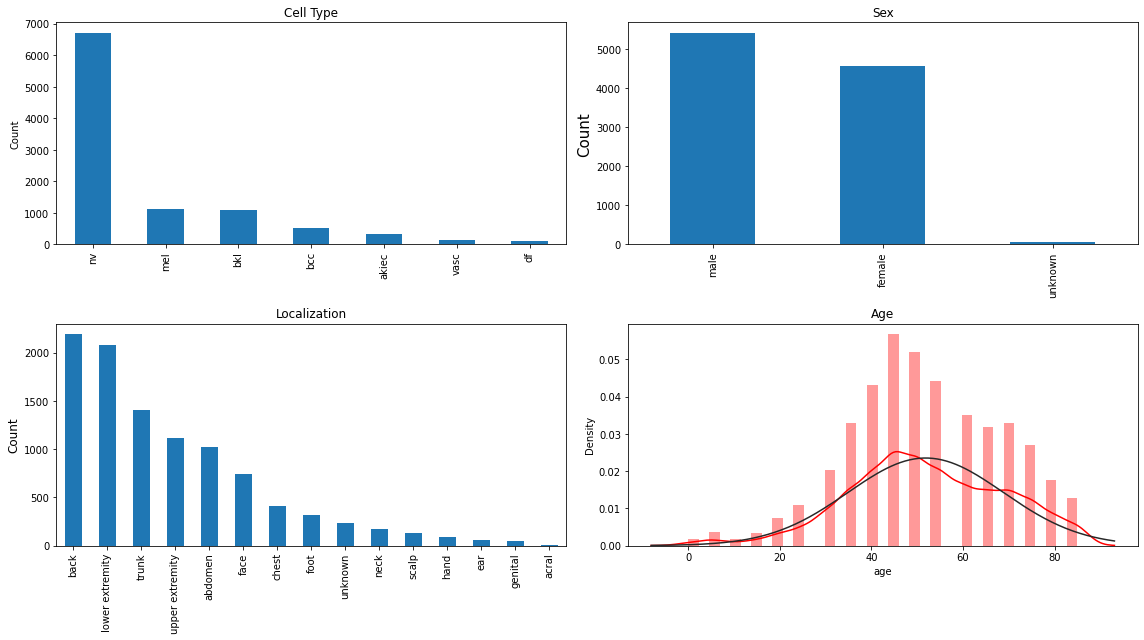

In [6]:
fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type')

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex')

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red')
ax4.set_title('Age')

plt.tight_layout()
plt.show()

### Scaling the Dataset

In [8]:
from sklearn.utils import resample

skin_label_dfs = []
for i in range(no_of_classes):
    skin_label_dfs.append(skin_df[skin_df['label'] == i])

print("Pre-scaling:\n", skin_df['label'].value_counts(), end='\n\n')

scale_to_qty = 1500
skin_label_balanced_dfs = []
for i in range(no_of_classes):
    skin_label_balanced_dfs.append(resample(skin_label_dfs[i], replace=True, n_samples=scale_to_qty, random_state=42))

skin_df_balanced = pd.concat(skin_label_balanced_dfs)
print("Post-scaling:\n", skin_df_balanced['label'].value_counts())
skin_df_balanced.head()

Pre-scaling:
 5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64

Post-scaling:
 0    1500
1    1500
2    1500
3    1500
4    1500
5    1500
6    1500
Name: label, dtype: int64


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,rosendahl,0
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,rosendahl,0
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,rosendahl,0
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,rosendahl,0
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,rosendahl,0


### Adding the Image Path & Image to the DataFrame

In [9]:
from glob import glob
from PIL import Image
import numpy as np

image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join('data/sorted_images/', '*', '*.jpg'))}

skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

SIZE = (32, 32)
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize(SIZE)))
skin_df_balanced.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,path,image
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,rosendahl,0,data/sorted_images\akiec\ISIC_0026645.jpg,"[[[155, 118, 107], [162, 126, 118], [174, 140,..."
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,rosendahl,0,data/sorted_images\akiec\ISIC_0025780.jpg,"[[[138, 76, 82], [131, 64, 68], [139, 73, 81],..."
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,rosendahl,0,data/sorted_images\akiec\ISIC_0024450.jpg,"[[[123, 86, 87], [174, 137, 137], [197, 161, 1..."
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,rosendahl,0,data/sorted_images\akiec\ISIC_0027896.jpg,"[[[205, 149, 175], [207, 149, 169], [214, 158,..."
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,rosendahl,0,data/sorted_images\akiec\ISIC_0029268.jpg,"[[[203, 174, 199], [205, 174, 197], [206, 175,..."


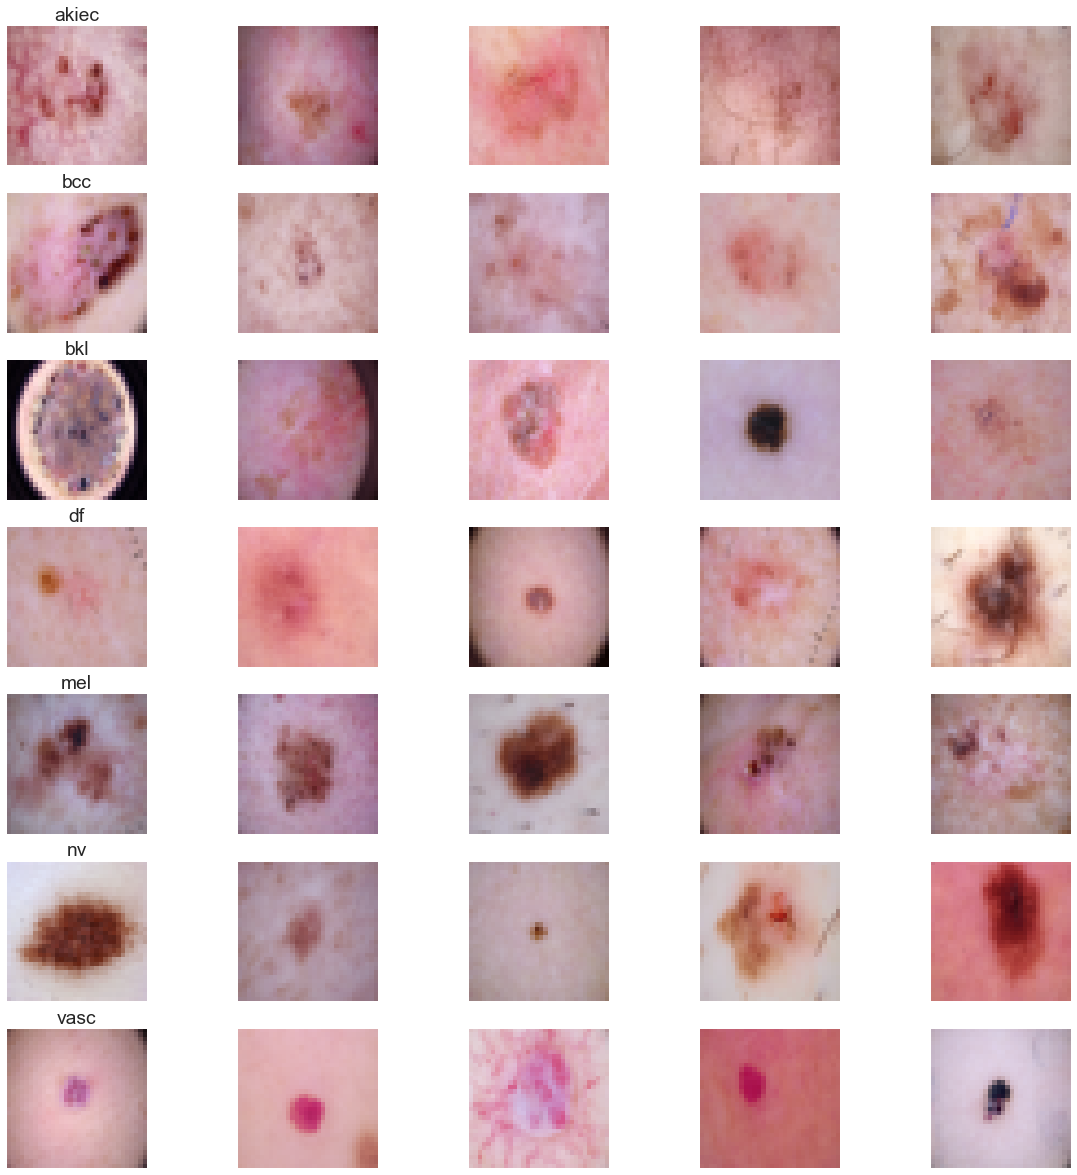

In [38]:
n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

## Training the Model

### Converting DataFrame to Numpy Array

In [9]:
from keras.utils import to_categorical

X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.0

Y = to_categorical(skin_df_balanced['label'], num_classes=no_of_classes)

### Defining the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE[0], SIZE[1], 3)))
model.add(MaxPool2D(pool_size=(2, 2)))  # Take most prominant feature
model.add(Dropout(0.3)) # Reduce the dimension & overfitting

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten()) # Change to 1D

model.add(Dense(32)) # Transfers data from prev layer to next layer with 32 neurons
model.add(Dense(7, activation='softmax')) # Convert input to probabitlity
#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc']) # Optimized the weights of neurons

### Fitting/Training the Model

In [ ]:
batch_size = 16
epochs = 200

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=2)

In [13]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

83/83 [==============================] - 3s 34ms/step - loss: 0.2954 - acc: 0.9055
Test accuracy: 0.9055238366127014


### Plot the Training and Validation Loss | Training and Validation Accuracy

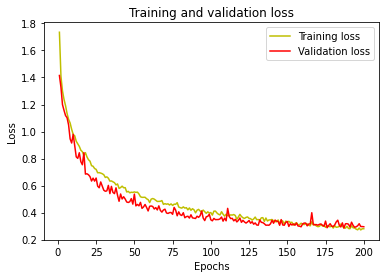

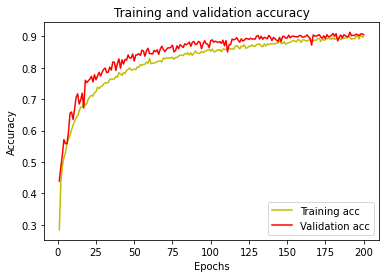

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Predicting on the Test Data

83/83 [==============================] - 5s 34ms/step


Text(88.0, 0.5, 'Fraction of incorrect predictions')

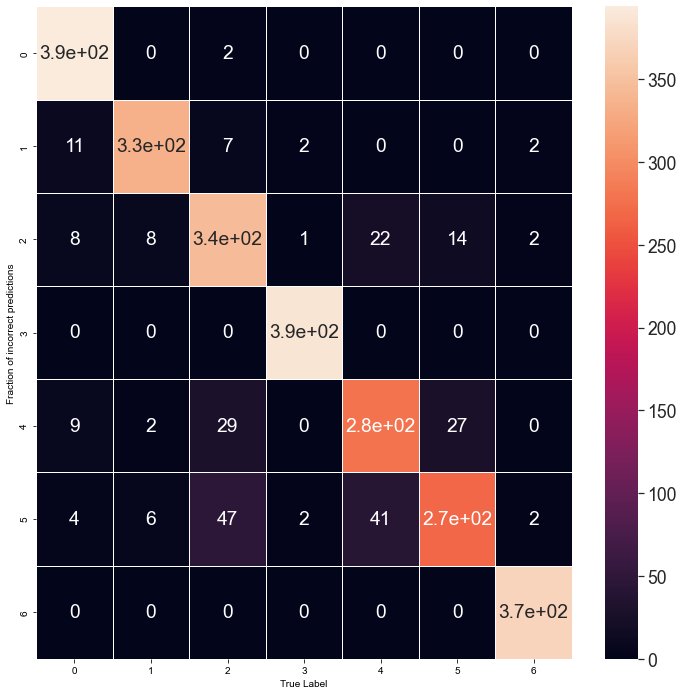

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [16]:
# save model
model.save('model_200.h5')

## Testing with Random Images

In [1]:
from keras.models import load_model
model_200 = load_model('models/model_200.h5')

In [29]:
from PIL import Image
import numpy as np

myImagesPath = ['data/myimages/img1.jpg','data/myimages/img2.jpg','data/myimages/img3.jpg','data/myimages/ISIC_0024318.jpg']
newDf = pd.DataFrame()
newDf['imagePath'] = myImagesPath
newDf['imagesData'] = newDf['imagePath'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

In [30]:
testData = np.asarray(newDf.imagesData.tolist())
pred = model_200.predict(testData)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [32]:
categories = ['akiec','bcc','bkl','df','mel','nv','vasc']

for i, p in enumerate(pred):
    for pos, val in enumerate(p,1):
        if(val==1):
            print("Categorized ", myImagesPath[i], " in category ", categories[pos-1])

Categorized  data/myimages/img1.jpg  in category  nv
Categorized  data/myimages/img2.jpg  in category  nv
Categorized  data/myimages/img3.jpg  in category  akiec
Categorized  data/myimages/ISIC_0024318.jpg  in category  df
